In [1]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import scikit_posthocs as sp
import my_statistics as mystats

In [2]:
df = pd.read_csv("capstone_data_clean.csv")
df["Adv_Year"] = df["Adv_Year"].astype("category")
df["Adv_Month"] = df["Adv_Month"].astype("category")
df["Gearbox_Type"] = df["Gearbox_Type"].astype("category")
df["Fuel_Type"] = df["Fuel_Type"].astype("category")

# Categorical features 

## Maker

As shown by statistical tests, Maker significantly influence the Price:
> Kruskal-Wallis H = 401677 
> p value = 0.0

Yet, the number of observations for each Maker considerably differ, which makes the analysis more vulnerable to errors.   

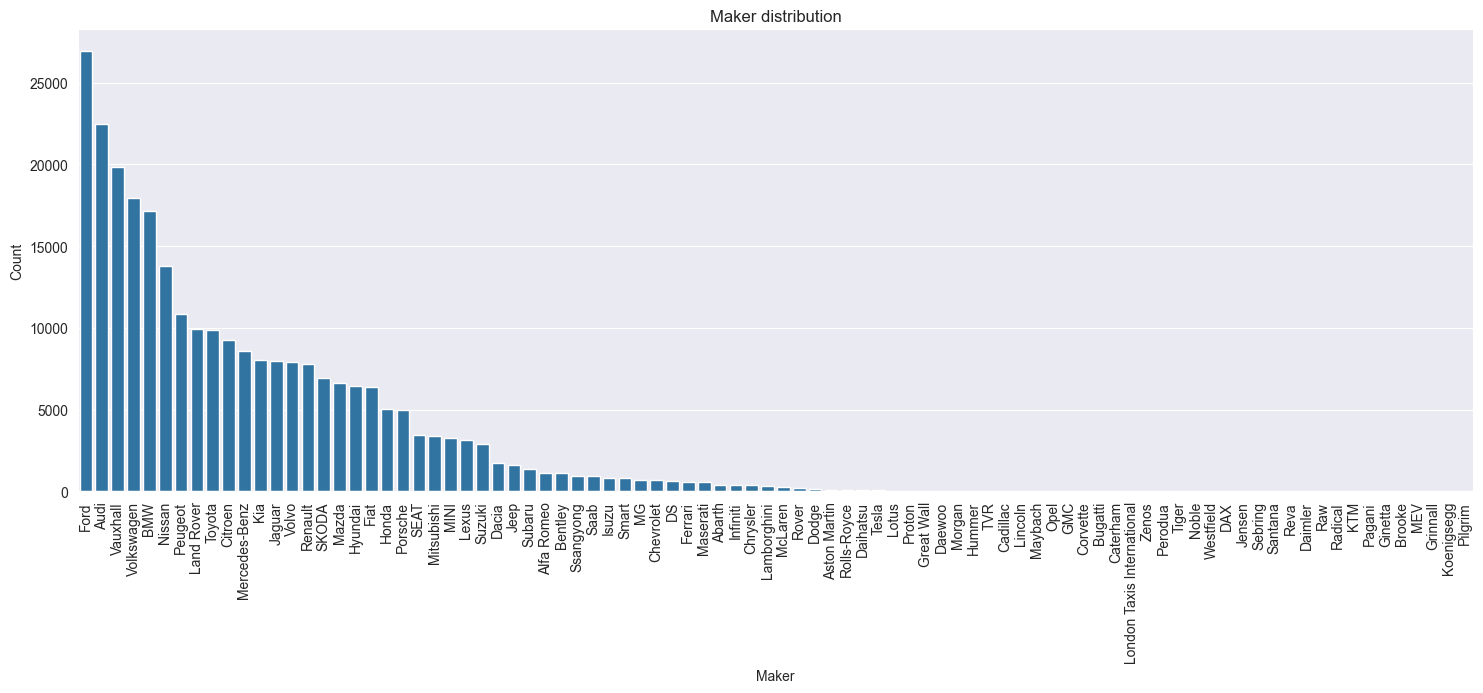

In [3]:
plt.figure(figsize=(18,6))
plt.title("Maker distribution")
plt.xlabel("Maker")
plt.ylabel("Count")

labels = df["Maker"].value_counts().index
counted = df["Maker"].value_counts().reset_index()

g = sns.barplot(counted, x="Maker", y="count", order=labels)

# g.bar_label(g.containers[0])
g.set_xticks(range(len(labels)))
g.set_xticklabels(labels, rotation=90)

plt.show()

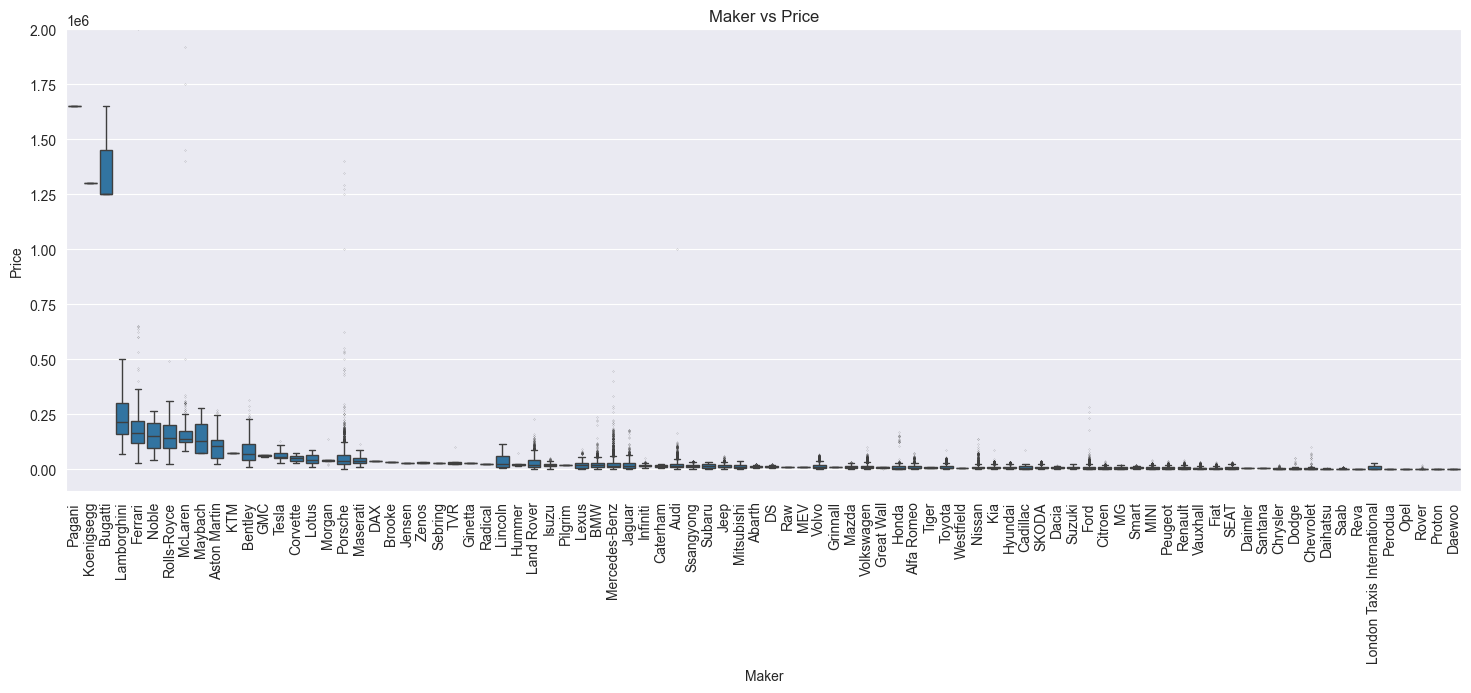

In [4]:
plt.figure(figsize=(18,6))
plt.title("Maker vs Price")
plt.xlabel("Maker")
plt.ylabel("Price")

labels = df.groupby("Maker")["Price"].median().sort_values(ascending=False).index
g = sns.boxplot(data=df, x="Maker", y="Price", fliersize=0.1, order=labels)

g.set_xticks(range(len(labels)))
g.set_xticklabels(labels, rotation=90)

plt.ylim(-100000, 2000000)

plt.show()

#### 3 brands have a visibly higher values of Price than the others.

The total numbers of records for each of them is 1-3.
The sample size is too low to use them for analysis, and such a high values of Price might influence the results. 

In [5]:
most_expensive = df.groupby("Maker")["Price"].median().sort_values(ascending=False).head(3).index
df[df["Maker"].isin(most_expensive)]

,Maker,Genmodel,Genmodel_ID,Adv_Year,Adv_Month,Color,Body_Type,Gearbox_Type,Fuel_Type,Reg_Year,...,Engine_Power,Annual_Tax,Wheelbase,Height,Width,Length,Average_Mpg,Top_Speed,Seat_Num,Door_Num
1106,Bugatti,Veyron,13_1,2017,Jul,Red,Coupe,Automatic,Petrol,2007.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN
1107,Bugatti,Veyron,13_1,2018,Apr,Multicolour,Coupe,Automatic,Petrol,2007.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN
1108,Bugatti,Veyron,13_1,2018,May,Black,Coupe,Automatic,Petrol,2007.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN
78724,Koenigsegg,Ccx,44_1,2018,Feb,Black,Coupe,Manual,Petrol,2017.0,...,NaN,140.0,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN
130554,Pagani,Huayra,67_1,2017,Oct,Red,NaN,NaN,NaN,2013.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Let's plot the Maker/Price relationship filtering them out

The differences between specific makers are still easily visible.

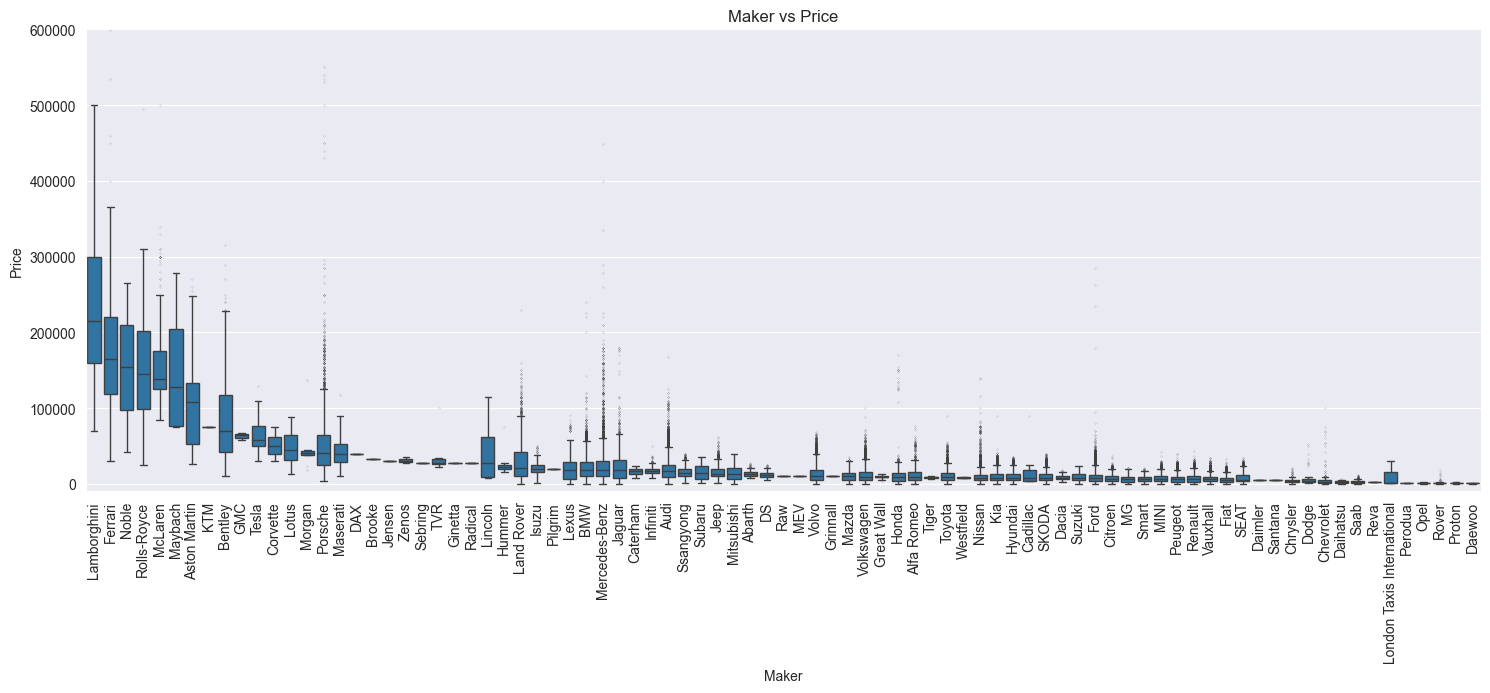

In [6]:
filtered = df[~df["Maker"].isin(most_expensive)]

plt.figure(figsize=(18,6))
plt.title("Maker vs Price")
plt.xlabel("Maker")
plt.ylabel("Price")

labels = filtered.groupby("Maker")["Price"].median().sort_values(ascending=False).index
g = sns.boxplot(data=filtered, x="Maker", y="Price", fliersize=0.1, order=labels)

g.set_xticks(range(len(labels)))
g.set_xticklabels(labels, rotation=90)

plt.ylim(-10000, 600000)

plt.show()

#### Now let's check the Maker/Price relationship only for top 10 most frequently advertised brands

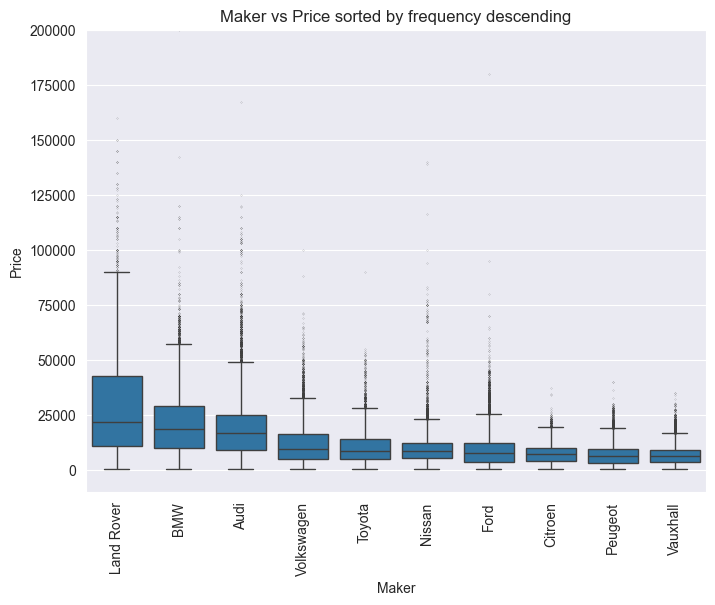

In [7]:
makers = df["Maker"].value_counts().head(10).index
common = df[df["Maker"].isin(makers)]

plt.figure(figsize=(8, 6))
plt.title("Maker vs Price sorted by frequency descending")
plt.xlabel("Maker")
plt.ylabel("Price")

labels = common.groupby("Maker")["Price"].median().sort_values(ascending=False).index
# labels = common["Maker"].value_counts().index
g = sns.boxplot(data=common, x="Maker", y="Price", fliersize=0.1, order=labels)

g.set_xticks(range(len(labels)))
g.set_xticklabels(labels, rotation=90)
plt.ylim(-10000, 200000)

plt.show()

#### Observations
Even here the prices among makers vary considerably and the differences are still statistically significant, as shown below.


#### Are the paired differences significant?

In [8]:
mystats.kruskal_one(common, "Maker", "Price")

KruskalResult(statistic=236657.93473983373, pvalue=0.0)

The critical $\Chi^2$ value for $\alpha$ = 0.05 and df = 8 is 15.507.

Restults of the Kruskal-Wallis test means that the results are statistically significant.
Conclusion: Prices among different makers vary significantly both across the whole dataset, and between 10 of the most common makers.

In [9]:
common_notnull = common.copy()
common_notnull = common_notnull.dropna(how="any")
matrix = sp.posthoc_dunn(common_notnull, val_col='Price', group_col='Maker', p_adjust='holm')
matrix[matrix > 0.05]

,Audi,BMW,Citroen,Ford,Land Rover,Nissan,Peugeot,Toyota,Vauxhall,Volkswagen
Audi,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
BMW,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Citroen,NaN,NaN,1.000000,0.853804,NaN,NaN,NaN,NaN,NaN,NaN
Ford,NaN,NaN,0.853804,1.000000,NaN,NaN,NaN,NaN,NaN,NaN
Land Rover,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
Nissan,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
Peugeot,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
Toyota,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN
Vauxhall,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN
Volkswagen,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0


### Are Citroën and Ford prices really not significantly different?

According to the Dunn test results, there's no statistically significant difference between Prices of those brands.
Yet, the Mann-Whitney U paired test p value is still below 0.05.

In [10]:
citroen = common[common["Maker"] == "Citroen"]
ford = common[common["Maker"] == "Ford"]

In [11]:
stats.mannwhitneyu(ford["Price"], citroen["Price"], nan_policy="omit")

MannwhitneyuResult(statistic=131213947.5, pvalue=1.3760293591184991e-14)

In [12]:
tests = common.copy()
tests["Maker"] = mystats.swap(common, "Maker")
new_categories = mystats.write_names(common, "Maker")[1]
new_categories

{1: 'Citroen',
 2: 'Ford',
 3: 'Land Rover',
 4: 'Nissan',
 5: 'Peugeot',
 6: 'Audi',
 7: 'BMW',
 8: 'Toyota',
 9: 'Vauxhall',
 10: 'Volkswagen'}

In [13]:
pair = tests[tests["Maker"].isin([1, 2])]
stats.mannwhitneyu(pair["Price"], pair["Maker"], nan_policy="omit")

MannwhitneyuResult(statistic=1307907225.0, pvalue=0.0)

##### Question: What's the difference between both use cases of Mann-Whitney test?

## Fuel Type

Type of the fuel appears to significantly influence price.
The results for the Kruskal-Wallis H test:
> H = 413107.4 
> p_value = 0.0

In [14]:
df["Fuel_Type"].value_counts().reset_index()

,Fuel_Type,count
0,Diesel,132613
1,Petrol,126892
2,Petrol Hybrid,5046
3,Electric,1304
4,Petrol Plug-in Hybrid,1275
5,Diesel Hybrid,155
6,Diesel Plug-in Hybrid,39
7,Bi Fuel,27
8,Petrol Ethanol,8


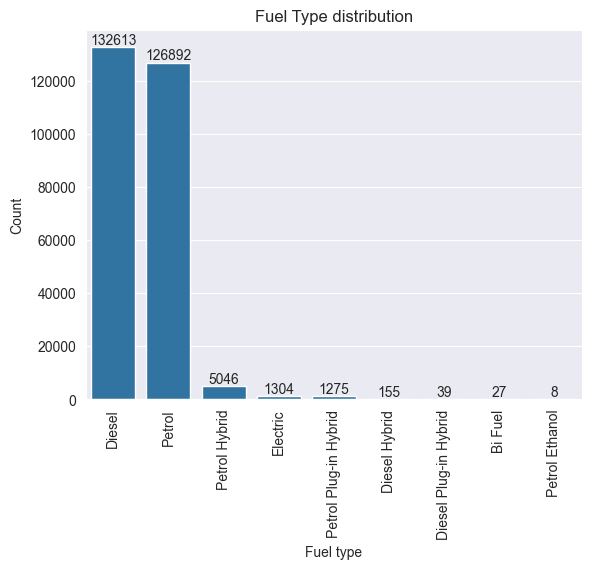

In [15]:
plt.title("Fuel Type distribution")
plt.xlabel("Fuel type")
plt.ylabel("Count")

labels = df["Fuel_Type"].value_counts().index
counted = df["Fuel_Type"].value_counts().reset_index()

g = sns.barplot(counted, x="Fuel_Type", y="count", order=labels)

g.bar_label(g.containers[0])
g.set_xticks(range(len(labels)))
g.set_xticklabels(labels, rotation=90)

plt.show()

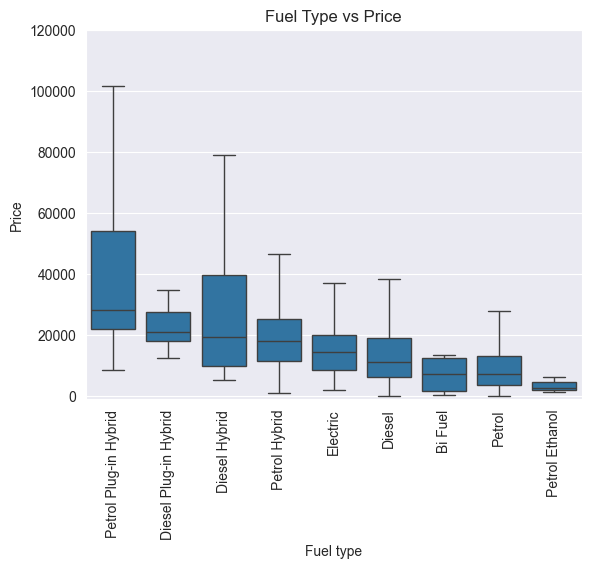

In [16]:
plt.title("Fuel Type vs Price")
plt.xlabel("Fuel type")
plt.ylabel("Price")

labels = df.groupby("Fuel_Type", observed=False)["Price"].median().sort_values(ascending=False).index
f = sns.boxplot(data=df, x="Fuel_Type", y="Price", fliersize=0, order=labels)

f.set_xticks(range(len(labels)))
f.set_xticklabels(labels, rotation=90)
plt.ylim(-1000, 120000)

plt.show()

### Differences in Price among specific categories

Fuel_Type variable affects the Prices across the whole dataset. However, the above-mentioned Kruskal-Wallis H test doesn't specify which categories differ from each other. To answer this question, I need to perform paired significance tests. 

In [17]:
tests = df.copy()
tests = tests[["Price", "Fuel_Type"]].dropna(how="any")
matrix = sp.posthoc_dunn(tests, val_col='Price', group_col='Fuel_Type', p_adjust='holm')
matrix[matrix > 0.05]

/Users/mpolcyn/PycharmProjects/udemy_python_course/.venv/lib/python3.12/site-packages/scikit_posthocs/_posthocs.py:357: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  x_lens = x.groupby(_group_col)[_val_col].count()
/Users/mpolcyn/PycharmProjects/udemy_python_course/.venv/lib/python3.12/site-packages/scikit_posthocs/_posthocs.py:360: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  x_ranks_avg = x.groupby(_group_col)['ranks'].mean()


,Bi Fuel,Diesel,Diesel Hybrid,Diesel Plug-in Hybrid,Electric,Petrol,Petrol Ethanol,Petrol Hybrid,Petrol Plug-in Hybrid
Bi Fuel,1.000000,NaN,NaN,NaN,NaN,0.592752,0.592752,NaN,NaN
Diesel,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Diesel Hybrid,NaN,NaN,1.000000,0.592752,NaN,NaN,NaN,0.558184,NaN
Diesel Plug-in Hybrid,NaN,NaN,0.592752,1.000000,NaN,NaN,NaN,0.109088,0.592752
Electric,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
Petrol,0.592752,NaN,NaN,NaN,NaN,1.000000,0.470989,NaN,NaN
Petrol Ethanol,0.592752,NaN,NaN,NaN,NaN,0.470989,1.000000,NaN,NaN
Petrol Hybrid,NaN,NaN,0.558184,0.109088,NaN,NaN,NaN,1.000000,NaN
Petrol Plug-in Hybrid,NaN,NaN,NaN,0.592752,NaN,NaN,NaN,NaN,1.000000


### It turns out, that some categories don't differ significantly from each other

Insignificant difference pairs:
- Bi Fuel / Petrol (p=0.59), Bi Fuel / Petrol Ethanol (p=0.59)
- Diesel Hybrid / Petrol Hybrid (p=0.47)
- Diesel Plug-In Hybrid / Petrol Plug-In Hybrid (p=0.59), Diesel Plug-In Hybrid / Petrol Hybrid (p=0.09)
- Petrol / Petrol Ethanol (p=0.47)

Some of the insignificantly different categories are very similar with each other. 
Hence, I think it's reasonable to bin them together.

In [18]:
bins = df.copy()

In [19]:
def bin_it(x):
    plug_in = ["Petrol Plug-in Hybrid", "Diesel Plug-in Hybrid"]
    hybrid = ["Diesel Hybrid", "Petrol Hybrid"]
    petrol = ["Petrol", "Petrol Ethanol"]
    if x in plug_in:
        return "Plug-in Hybrid"
    elif x in hybrid:
        return "Standard Hybrid"
    elif x in petrol:
        return "Petrol/Petrol Ethanol"
    return x

In [20]:
bins["Fuel_Type"] = bins["Fuel_Type"].apply(bin_it)

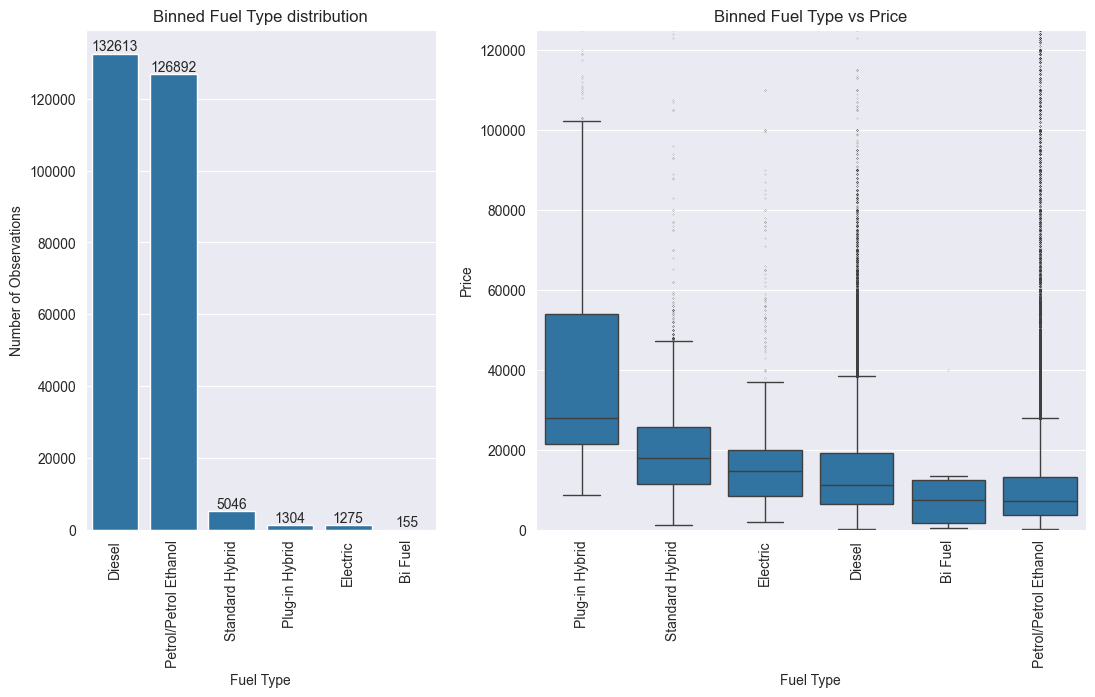

In [21]:
fig = plt.figure(figsize=(10, 5))
ax1 = fig.add_axes([0, 0, 0.35, 1])
ax2 = fig.add_axes([0.45, 0, 0.55, 1])

ax1.set_title("Binned Fuel Type distribution")
ax1.set_xlabel("Fuel Type")
ax1.set_ylabel("Number of Observations")

labels1 = bins["Fuel_Type"].value_counts().index
counted = bins["Fuel_Type"].value_counts().reset_index()

a = sns.barplot(counted, x="Fuel_Type", y="count", order=labels1, ax=ax1)
a.bar_label(g.containers[0])
a.set_xticks(range(len(labels1)))
a.set_xticklabels(labels1, rotation=90)

ax2.set_title("Binned Fuel Type vs Price")
ax2.set_xlabel("Fuel Type")
ax2.set_ylabel("Price")

labels2 = bins.groupby("Fuel_Type")["Price"].median().sort_values(ascending=False).index

b = sns.boxplot(bins, x="Fuel_Type", y="Price", fliersize=0.1, order=labels2, ax=ax2)
b.set_xticks(range(len(labels2)))
b.set_xticklabels(labels2, rotation=90)
ax2.set_ylim(0, 125000)

plt.show()

### Statistical tests with binned categories
After binning the categories, the Kruskal-Wallis H test results mean that there's still statistically significant difference in prices based on fuel type. 

As for the specific categories: There's only one insignificant difference between Bi Fuel and Petrol/Petrol Ethanol categories.

In [22]:
mystats.kruskal_one(bins, "Fuel_Type", "Price")

KruskalResult(statistic=412063.0487413737, pvalue=0.0)

In [23]:
tests = bins.copy()
tests = tests[["Price", "Fuel_Type"]].dropna(how="any")
matrix = sp.posthoc_dunn(tests, val_col='Price', group_col='Fuel_Type', p_adjust='holm')
matrix[matrix > 0.05]

,Bi Fuel,Diesel,Electric,Petrol/Petrol Ethanol,Plug-in Hybrid,Standard Hybrid
Bi Fuel,1.00000,NaN,NaN,0.30375,NaN,NaN
Diesel,NaN,1.0,NaN,NaN,NaN,NaN
Electric,NaN,NaN,1.0,NaN,NaN,NaN
Petrol/Petrol Ethanol,0.30375,NaN,NaN,1.00000,NaN,NaN
Plug-in Hybrid,NaN,NaN,NaN,NaN,1.0,NaN
Standard Hybrid,NaN,NaN,NaN,NaN,NaN,1.0


# Numerical features

## Reg_Year

According to the Spearman r correlation test, registration year has a strong positive, statistically significant correlation with price.
> r = 0.735516
> p = 0.0 

It's the highest r value among all the numeric variables in the dataset.

In [24]:
df["Reg_Year"].nunique()

25

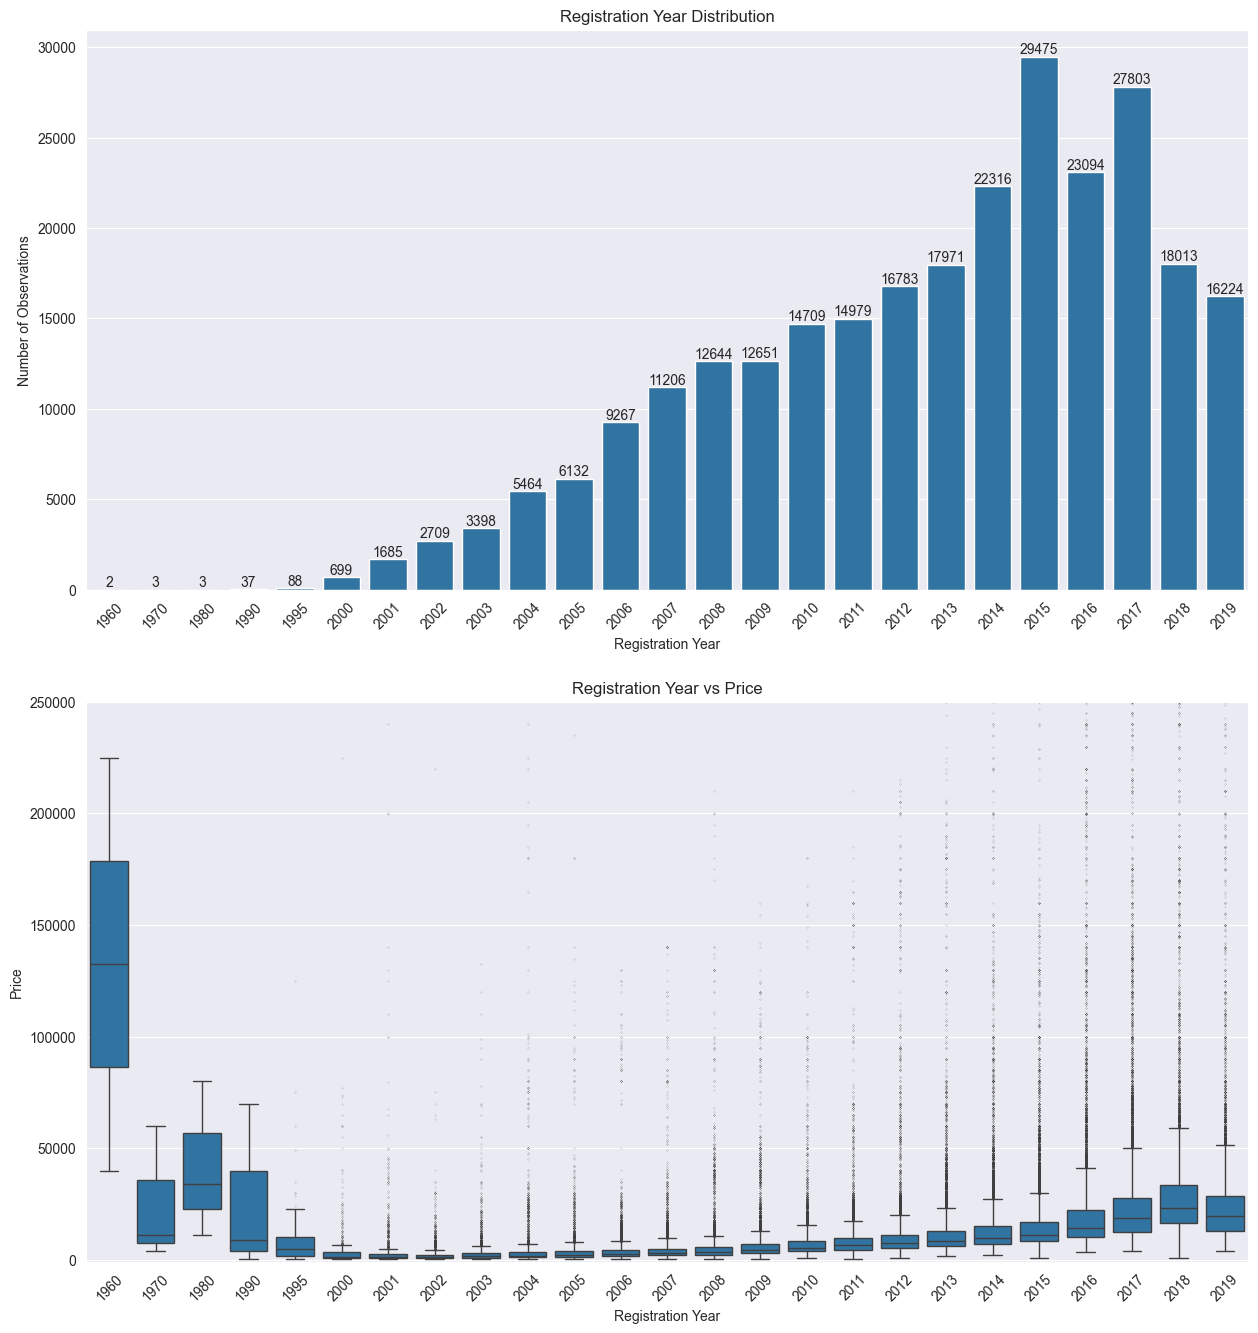

In [25]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(15, 16))

counted = df["Reg_Year"].value_counts().reset_index()
labels = sorted(counted["Reg_Year"].unique())

axes[0].set_title("Registration Year Distribution")
axes[0].set_xlabel("Registration Year")
axes[0].set_ylabel("Number of Observations")
a = sns.barplot(counted, x="Reg_Year", y="count", order=labels, ax=axes[0])
a.bar_label(a.containers[0])

a.set_xticks(range(len(labels)))
a.set_xticklabels(np.array(labels).astype(int), rotation=45)


axes[1].set_title("Registration Year vs Price")
axes[1].set_xlabel("Registration Year")
axes[1].set_ylabel("Price")

b = sns.boxplot(df, x="Reg_Year", y="Price", order=labels, fliersize=0.1, ax=axes[1])

b.set_xticks(range(len(labels)))
b.set_xticklabels(np.array(labels).astype(int), rotation=45)

axes[1].set_ylim(-1000, 250000)
plt.show() 

#### The charts above show several things:
1. The number of observations in the period 1960-1995 is less than 100, with as few as 2-3 observations for years 1960, 1970, and 1980.
2. The numer of observations gradually increases in the period 1960-2015 with a slight deviation from this trend in 2009.
3. The number of observations after 2015 decreases.
4. The median prices and prices within 1 std before the 2000 year seem to be higher than in subsequent years.
5. From the 2000th year onward the prices seem to gradually raise, with an exception in 2019th year.  

### Do the outliers in 1960-1995 period affect the strength of correlation?

In [26]:
old = df[df["Reg_Year"].isin(labels[:5])]
new = df[df["Reg_Year"].isin(labels[5:])]

In [27]:
old_corr = stats.spearmanr(old["Reg_Year"], old["Price"], nan_policy="omit")
new_corr = stats.spearmanr(new["Reg_Year"], new["Price"], nan_policy="omit")
all_corr = stats.spearmanr(df["Reg_Year"], df["Price"], nan_policy="omit")

year_price = pd.DataFrame({
    "Period": ["1960-1995", "2000-2019", "1960-2019"],
    "Correlation": [old_corr[0], new_corr[0], all_corr[0]], 
    "P-value": [old_corr[1], new_corr[1], all_corr[1]]
})
year_price.set_index("Period", inplace=True)

In [28]:
year_price

,Correlation,P-value
Period,,
1960-1995,-0.360920,0.000021
2000-2019,0.737179,0.000000
1960-2019,0.736614,0.000000


#### Conclusion
There's a weak negative, statistically significant correlation between Reg_Year and Price correlation in 1960-1995. 
But due to the low number of observations in 1960-1995, the correlation for the 2000-2019 period is almost exactly the same as for the whole dataset.

## Mileage
Mileage holds the second-highest absolute value of Spearman r for correlations of numeric variables and price.
> r = -0.665604
> p = 0.0

The correlation is negative and of moderate strength, but close to strong, which starts from -0.68. 
Negative correlation is logical in this case, since the higher car's mileage, the more exploited it is.

In [29]:
df["Mileage"].nunique()

72420

In [30]:
df["Mileage"].describe()

count    2.663180e+05
mean     4.825537e+04
std      4.183804e+04
min      0.000000e+00
25%      1.426025e+04
50%      3.945850e+04
75%      7.500000e+04
max      6.363342e+06
Name: Mileage, dtype: float64

In [31]:
df["Price"].describe()

count    2.662350e+05
mean     1.471670e+04
std      2.594508e+04
min      1.000000e+02
25%      4.990000e+03
50%      9.295000e+03
75%      1.711100e+04
max      2.599990e+06
Name: Price, dtype: float64

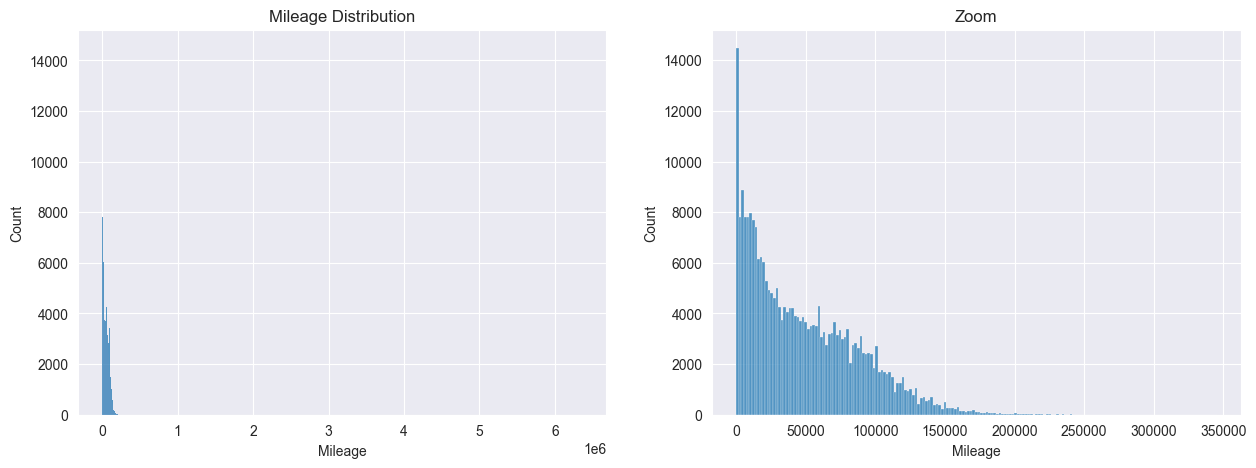

In [32]:
fig, axes = plt.subplots(ncols=2, nrows=1, figsize=(15, 5))

axes[0].set_title("Mileage Distribution")
a = sns.histplot(df, x="Mileage", ax=axes[0])

axes[1].set_title("Zoom")
zoom = df[df["Mileage"] < 400000]
b = sns.histplot(zoom, x="Mileage", ax=axes[1])

plt.show()

#### Observations to the above distribution plots:
1. Mileage variable distribution is highly positively skewed, similarly to the distribution of price.
2. Mileage has some extremely high outliers with a maximum close to 6 millions, also similarly to the price variable.

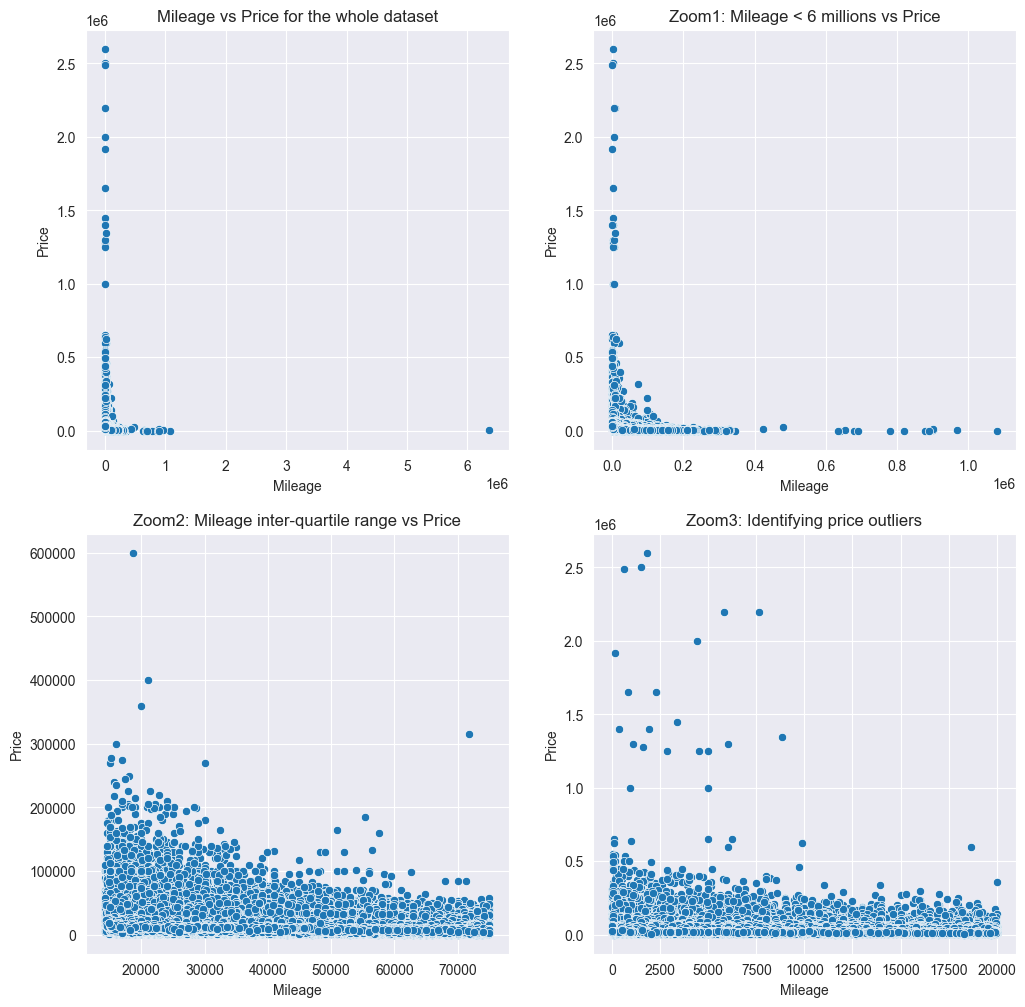

In [33]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(ncols=2, nrows=2, figsize=(12, 12))

ax1.set_title("Mileage vs Price for the whole dataset")
a = sns.scatterplot(df, x="Mileage", y="Price", ax=ax1)

ax2.set_title("Zoom1: Mileage < 6 millions vs Price")
zoom = df[df["Mileage"] < 6000000]
b = sns.scatterplot(zoom, x="Mileage", y="Price", ax=ax2)

ax3.set_title("Zoom2: Mileage inter-quartile range vs Price")
m_q25 = df["Mileage"].quantile(.25)
m_q75 = df["Mileage"].quantile(.75)
c3 = df["Mileage"].between(m_q25, m_q75)
zoom3 = df[c3]
c = sns.scatterplot(zoom3, x="Mileage", y="Price", ax=ax3)

ax4.set_title("Zoom3: Identifying price outliers")
c1 = df["Mileage"] < 20000
# c2 = df["Price"] < 1000000
zoom2 = df[c1]
d = sns.scatterplot(zoom2, x="Mileage", y="Price", ax=ax4)

plt.show()

#### Observations to the above scatter-plots
1. All extremely high values of price correspond to very low values of mileage, and vice versa.
2. The negative correlation is easily visible, but still far from the linear relationship.

## Engine Power

Engine Power has the 3-to-highest strength od Spearman r correlation value:
> r = 0.580741
> p = 0.0

That means a moderate, positive, statistically significant relationship.

### Distribution of the variable 

In [34]:
df["Engine_Power"].describe()

count    235665.000000
mean        150.681910
std          84.527666
min          17.000000
25%          99.000000
50%         128.000000
75%         175.000000
max         740.000000
Name: Engine_Power, dtype: float64

In [35]:
df["Engine_Power"].mode()

0    148.0
Name: Engine_Power, dtype: float64

In [36]:
stats.normaltest(df["Engine_Power"], nan_policy="omit")

NormaltestResult(statistic=120230.64615296418, pvalue=0.0)

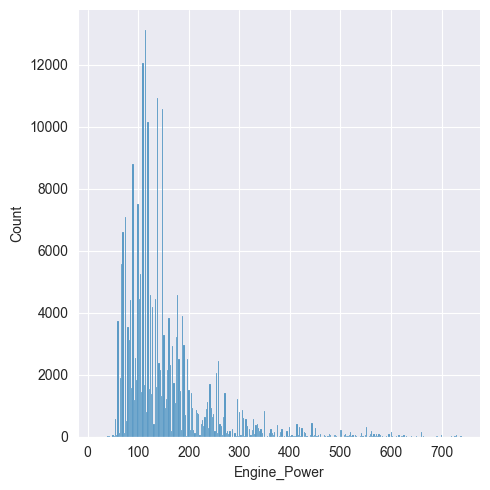

In [37]:
sns.displot(df, x="Engine_Power")

#### Observations to the variable distribution
1. The distribution of Engine Power is positively skewed.
2. The most common power is 148 HP.

### Engine Power vs Price

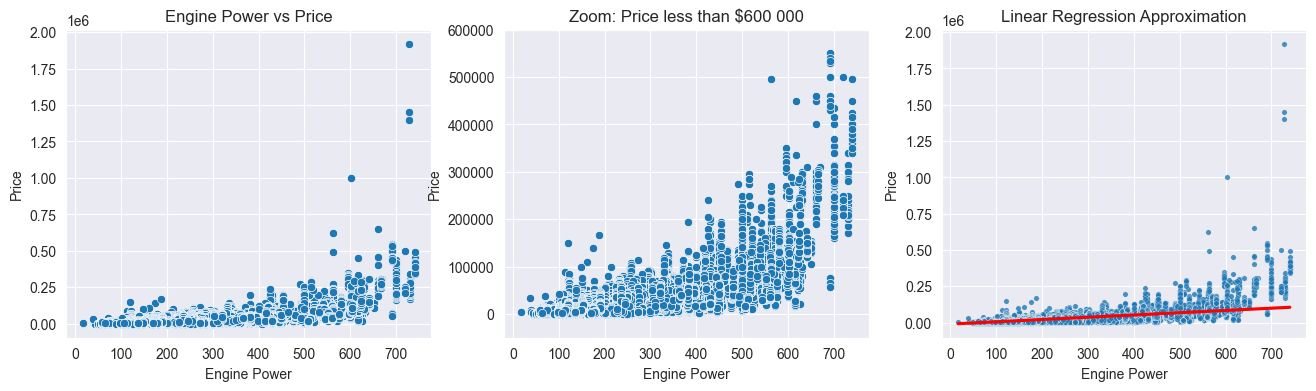

In [38]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(16, 4))

sns.scatterplot(df, x="Engine_Power", y="Price", ax=axes[0])
axes[0].set_title("Engine Power vs Price")
axes[0].set_xlabel("Engine Power")

sns.scatterplot(df, x="Engine_Power", y="Price", ax=axes[1])
axes[1].set_title("Zoom: Price less than $600 000")
axes[1].set_xlabel("Engine Power")
axes[1].set_ylim([-50000, 600000])

sns.regplot(df, x="Engine_Power", y="Price", ax=axes[2], scatter_kws={"s": 15, "edgecolors": "white", "linewidths": 0.2}, line_kws={"color": "r"})
axes[2].set_title("Linear Regression Approximation")
axes[2].set_xlabel("Engine Power")

plt.show()

#### Observations
1. Positive correlation is visible on the scatter plots. 
2. the outliers in the price are related to the very high values of engine power.
3. The relationship isn't linear.

#### Comments

The strength of correlation isn't strictly related to the linearity of relationship. 
Even in case of very strong correlation, the distribution on scatter plot may differ from the regression line.

For example, in this dataset the strongest correlation is between Engine Power and Engine Size.

SignificanceResult(statistic=0.8850438147851867, pvalue=0.0)

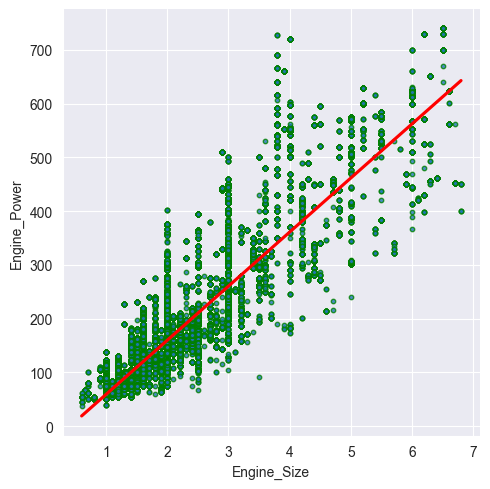

In [39]:
sns.lmplot(df, x="Engine_Size", y="Engine_Power", scatter_kws={"s": 10, "edgecolors": "g"}, line_kws={"color": "r"})
stats.spearmanr(df["Engine_Power"], df["Engine_Size"], nan_policy="omit")

# Bonus

## What's the relationship between age and price?

In [40]:
mods = df.copy()
mods.insert(6, "Age", 0, True)
mods["Adv_Year"] = mods["Adv_Year"].astype(int)
mods["Age"] = (mods["Adv_Year"] - mods["Reg_Year"])
mods.head()

,Maker,Genmodel,Genmodel_ID,Adv_Year,Adv_Month,Color,Age,Body_Type,Gearbox_Type,Fuel_Type,...,Engine_Power,Annual_Tax,Wheelbase,Height,Width,Length,Average_Mpg,Top_Speed,Seat_Num,Door_Num
0,Bentley,Arnage,10_1,2018,Apr,Silver,18.0,Saloon,Automatic,Petrol,...,NaN,NaN,3116.0,1515.0,2125.0,5390.0,NaN,NaN,5.0,4.0
1,Bentley,Arnage,10_1,2018,Jun,Grey,16.0,Saloon,Automatic,Petrol,...,450.0,315.0,3116.0,1515.0,2125.0,5390.0,13.7,179.0,5.0,4.0
2,Bentley,Arnage,10_1,2017,Nov,Blue,15.0,Saloon,Automatic,Petrol,...,400.0,315.0,3116.0,1515.0,2125.0,5390.0,14.7,155.0,5.0,4.0
3,Bentley,Arnage,10_1,2018,Apr,Green,15.0,Saloon,Automatic,Petrol,...,NaN,NaN,3116.0,1515.0,2125.0,5390.0,NaN,NaN,5.0,4.0
4,Bentley,Arnage,10_1,2017,Nov,Grey,14.0,Saloon,Automatic,Petrol,...,NaN,NaN,3116.0,1515.0,2125.0,5390.0,NaN,NaN,5.0,4.0


<Axes: xlabel='Age', ylabel='Price'>

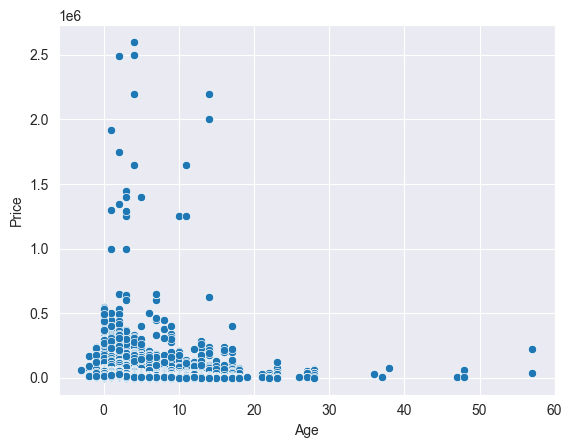

In [41]:
sns.scatterplot(mods, x="Age", y="Price")

In [42]:
stats.spearmanr(mods["Age"], mods["Price"], nan_policy="omit")

SignificanceResult(statistic=-0.738168374547422, pvalue=0.0)

### The overall correlation

The correlation for the whole dataset is strong negative, and the result is statistically significant.

## Let's break it down to brands

In [43]:
def spearman_grouped(data_frame, grouping_column, correlation_x, correlation_y):
    table = pd.DataFrame()
    grouped = data_frame.groupby(grouping_column, observed=False)
    names = []
    corr = []
    pvalues = []
    
    for name in data_frame[grouping_column].unique():
        grp = grouped.get_group(name)
        test = stats.spearmanr(grp[correlation_x], grp[correlation_y], nan_policy="omit")
        names.append(name)
        corr.append(test[0])
        pvalues.append(test[1])
    
    table[grouping_column] = names
    table["Spearman_R"] = corr
    table["P_Value"] = pvalues
        
    return table

In [44]:
price_age = spearman_grouped(mods, "Maker", "Price", "Age")
price_age[price_age["Spearman_R"].notnull()].sort_values("Spearman_R")

/Users/mpolcyn/PycharmProjects/udemy_python_course/.venv/lib/python3.12/site-packages/scipy/stats/_stats_py.py:5445: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(warn_msg))


,Maker,Spearman_R,P_Value
38,Lincoln,-1.000000,0.000000
8,Corvette,-1.000000,0.000000
81,Tiger,-1.000000,NaN
56,Perodua,-1.000000,NaN
53,Noble,-1.000000,NaN
...,...,...,...
51,Morgan,-0.265583,0.320143
67,Rover,-0.168877,0.017105
3,Cadillac,-0.054554,0.907523
2,Bugatti,0.500000,0.666667


#### Brand with very strong, significant correlation, and satisfying number of observations

In [45]:
counted = df["Maker"].value_counts()
counted.loc["Bentley"]

1105

<Axes: xlabel='Age', ylabel='Price'>

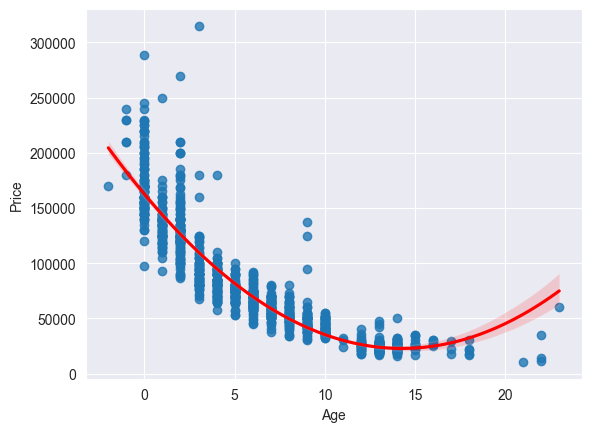

In [46]:
brands = mods.groupby("Maker")
bentley = brands.get_group("Bentley")
sns.regplot(bentley, x="Age", y="Price", line_kws={"color" : "r"}, order=2)

#### Bentley - broken down to models

In [47]:
bentley_models = spearman_grouped(bentley, "Genmodel", "Age", "Price")
bentley_models

,Genmodel,Spearman_R,P_Value
0,Arnage,-0.454937,1.153944e-02
1,Azure,NaN,NaN
2,Bentayga,-0.802773,1.816476e-33
3,Brooklands,-0.740656,9.216726e-02
4,Continental,-0.958401,0.000000e+00
5,Flying Spur,-0.873071,9.602919e-20
6,Mulsanne,-0.877131,1.307779e-15
7,Series I,NaN,NaN


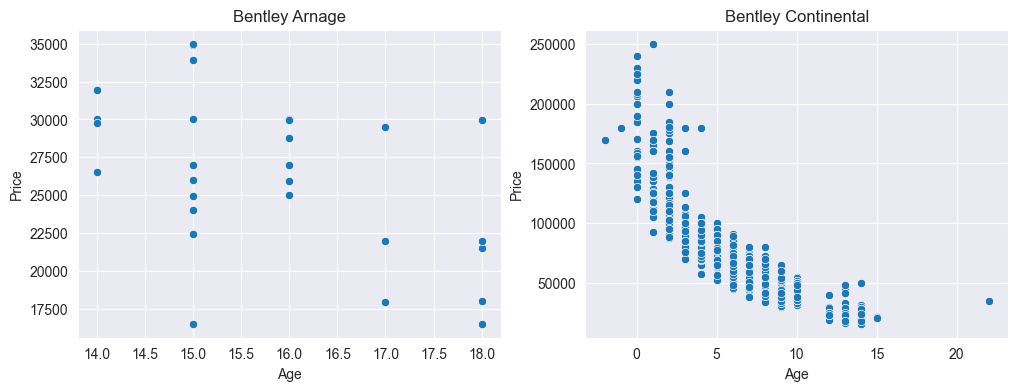

In [48]:
arnage = mods[(mods["Maker"] == "Bentley") & (mods["Genmodel"] == "Arnage")]
continental = mods[(mods["Maker"] == "Bentley") & (mods["Genmodel"] == "Continental")]

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))

sns.scatterplot(arnage, x="Age", y="Price", ax=axes[0])
axes[0].set_title("Bentley Arnage")

sns.scatterplot(continental, x="Age", y="Price", ax=axes[1])
axes[1].set_title("Bentley Continental")

plt.show()

In [49]:
bentley_models[bentley_models["P_Value"] < 0.05]

,Genmodel,Spearman_R,P_Value
0,Arnage,-0.454937,1.153944e-02
2,Bentayga,-0.802773,1.816476e-33
4,Continental,-0.958401,0.000000e+00
5,Flying Spur,-0.873071,9.602919e-20
6,Mulsanne,-0.877131,1.307779e-15


#### Brand with one of the weakest, significant correlation and satisfying number of observations

In [50]:
counted = df["Maker"].value_counts()
counted.loc["Rover"]

199

<Axes: xlabel='Age', ylabel='Price'>

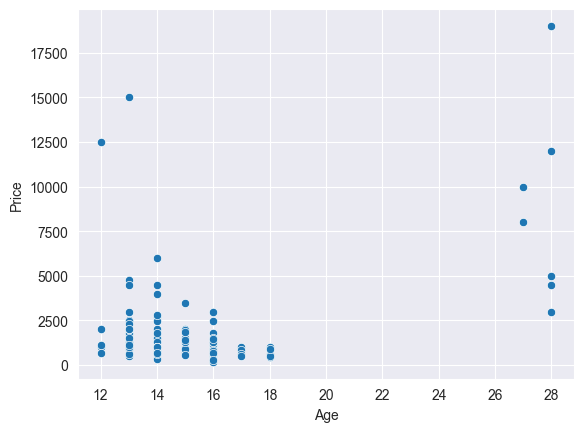

In [51]:
rover = brands.get_group("Rover")
sns.scatterplot(rover, x="Age", y="Price")

### Observations
1. For age in range 12-18 prices seem to gradually decrease, but there's a sudden peak after 26 years.
2. The reason for that is that there's only one model with age greater than 26

In [52]:
rover[rover["Age"] > 26]

,Maker,Genmodel,Genmodel_ID,Adv_Year,Adv_Month,Color,Age,Body_Type,Gearbox_Type,Fuel_Type,...,Engine_Power,Annual_Tax,Wheelbase,Height,Width,Length,Average_Mpg,Top_Speed,Seat_Num,Door_Num
154643,Rover,Mini,78_6,2017,Sep,Red,27.0,Saloon,Automatic,Petrol,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,2.0
154644,Rover,Mini,78_6,2018,May,White,28.0,Saloon,Manual,Petrol,...,40.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,2.0
154645,Rover,Mini,78_6,2017,Dec,Blue,27.0,Saloon,Automatic,Petrol,...,40.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,2.0
154646,Rover,Mini,78_6,2018,May,Red,28.0,Saloon,Manual,Petrol,...,40.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,2.0
154647,Rover,Mini,78_6,2018,May,Multicolour,28.0,Saloon,Manual,Petrol,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,2.0
154648,Rover,Mini,78_6,2018,May,White,28.0,Saloon,Manual,Petrol,...,79.0,NaN,2040.0,1350.0,1560.0,3050.0,NaN,90.0,4.0,2.0
154649,Rover,Mini,78_6,2018,May,Blue,28.0,Saloon,Manual,Petrol,...,40.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,2.0


#### Rover - broken down to models

In [53]:
rover_models = spearman_grouped(rover, "Genmodel", "Age", "Price")
rover_models.sort_values("Spearman_R")

/Users/mpolcyn/PycharmProjects/udemy_python_course/.venv/lib/python3.12/site-packages/scipy/stats/_stats_py.py:5445: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(warn_msg))


,Genmodel,Spearman_R,P_Value
1,45,-0.385758,0.155579
2,75,-0.325243,0.000099
0,25,-0.289337,0.170272
5,Mini,-0.158114,0.734920
6,Streetwise,0.000000,1.000000
3,75 Tourer,0.039841,0.932418
4,City Rover,NaN,NaN


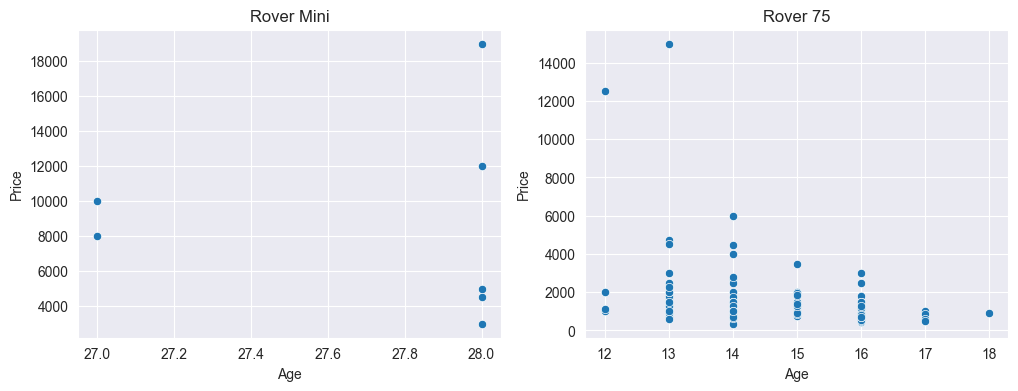

In [54]:
mini = mods[(mods["Maker"] == "Rover") & (mods["Genmodel"] == "Mini")]
r_75 = mods[(mods["Maker"] == "Rover") & (mods["Genmodel"] == "75")]

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))

sns.scatterplot(mini, x="Age", y="Price", ax=axes[0])
axes[0].set_title("Rover Mini")

sns.scatterplot(r_75, x="Age", y="Price", ax=axes[1])
axes[1].set_title("Rover 75")

plt.show()

In [55]:
rover_models[rover_models["P_Value"] < 0.05]

,Genmodel,Spearman_R,P_Value
2,75,-0.325243,0.000099


## Color 

I'd think it shouldn't be so important, but according to the statistical tests it significantly affects prices.

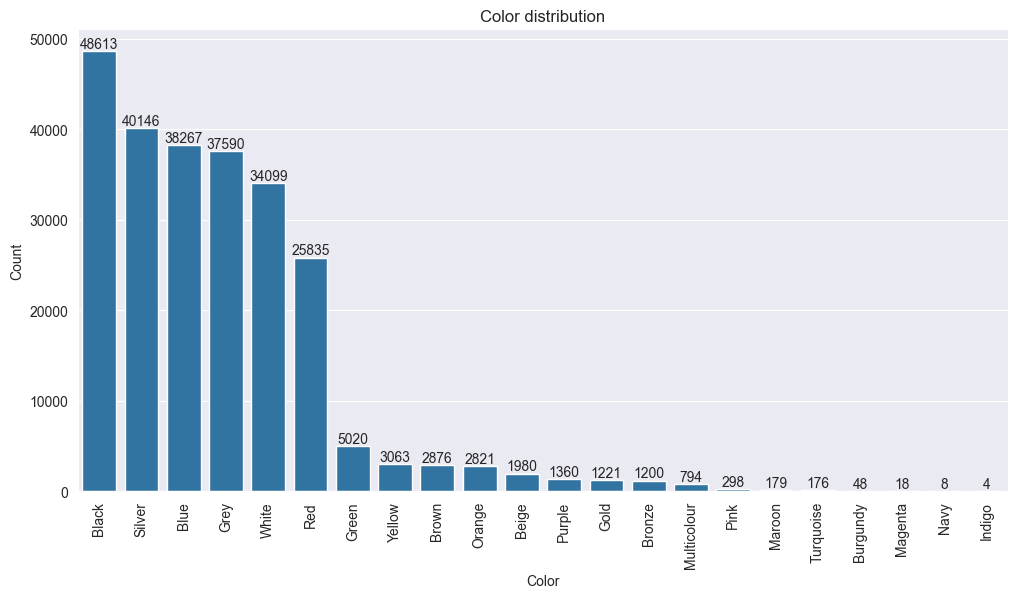

In [56]:
plt.figure(figsize=(12, 6))
plt.title("Color distribution")
plt.xlabel("Color")
plt.ylabel("Count")

labels = df["Color"].value_counts().index
counted = df["Color"].value_counts().reset_index()

g = sns.barplot(counted, x="Color", y="count", order=labels)

g.bar_label(g.containers[0])
g.set_xticks(range(len(labels)))
g.set_xticklabels(labels, rotation=90)

plt.show()

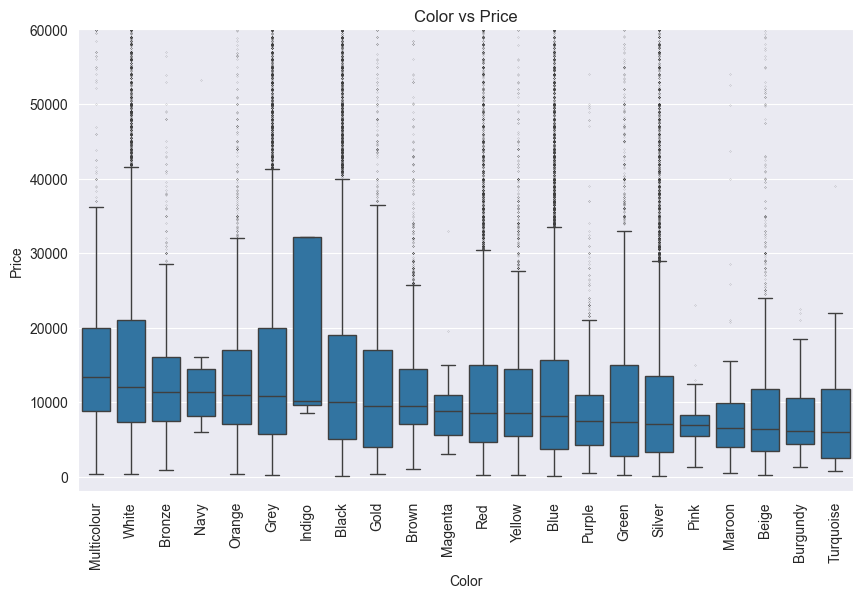

In [57]:
plt.figure(figsize=(10,6))
plt.title("Color vs Price")
plt.xlabel("Color")
plt.ylabel("Price")

labels = df.groupby("Color")["Price"].median().sort_values(ascending=False).index
g = sns.boxplot(data=df, x="Color", y="Price", fliersize=0.1, order=labels)
g.set_xticks(range(len(labels)))
g.set_xticklabels(labels, rotation=90)
plt.ylim(-2000, 60000)

plt.show()

### Let's examine colors with at least 1000 observations

In [58]:
slice = df["Color"].value_counts()[df["Color"].value_counts() > 1000].index
colors = df.copy()
colors = colors[colors["Color"].isin(slice)]


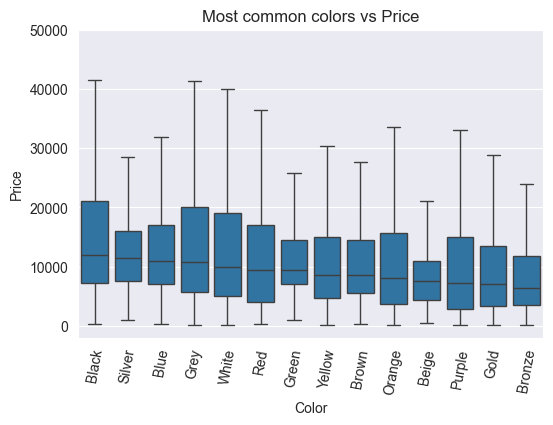

In [59]:
plt.figure(figsize=(6,4))
plt.title("Most common colors vs Price")
plt.xlabel("Color")
plt.ylabel("Price")

labels = colors.groupby("Color")["Price"].median().sort_values(ascending=False).index
g = sns.boxplot(data=colors, x="Color", y="Price", fliersize=0, order=labels)
g.set_xticks(range(len(labels)))
g.set_xticklabels(slice, rotation=80)
plt.ylim(-2000, 50000)

plt.show()

#### Is the difference still significant?

According to the following Kruskal-wallis test it is, but the test doesn't specify which categories differ specifically, so further paired tests are still necessary.  

In [60]:
mystats.kruskal_one(colors, "Color", "Price")

KruskalResult(statistic=366392.22968000127, pvalue=0.0)

In [61]:
colors_notnull = colors.copy()
colors_notnull = colors_notnull[["Price", "Color"]].dropna(how="any")
matrix = sp.posthoc_dunn(colors_notnull, val_col='Price', group_col='Color', p_adjust='holm')
matrix[matrix > 0.05]

,Beige,Black,Blue,Bronze,Brown,Gold,Green,Grey,Orange,Purple,Red,Silver,White,Yellow
Beige,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.280231,NaN,NaN,NaN,NaN
Black,NaN,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Blue,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Bronze,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,0.182885,1.000000,NaN,NaN,NaN,NaN,NaN
Brown,NaN,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Gold,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,0.141742,NaN,NaN,1.000000
Green,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.000000,NaN,1.0,NaN,NaN
Grey,NaN,NaN,NaN,0.182885,NaN,NaN,NaN,1.000000,0.280231,NaN,NaN,NaN,NaN,NaN
Orange,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,0.280231,1.000000,NaN,NaN,NaN,NaN,NaN
Purple,0.280231,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.000000,NaN,1.0,NaN,NaN


### Conclusion
Even with paired tests most of the differences are still statistically significant. However, based on the logical reasoning it shouldn't happen. That leads to the conclusion that it might be an apparent correlation.